In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

baby_names = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv",
                           sep=',') 
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


In [9]:
# Questions:
# 1. Delete unnamed columns
# 2. Show the distribution of male and female
# 3. Show the top 5 most preferred names
# 4. What is the median name occurence in the dataset
# 5. Distribution of male and female born count by states

#1 
baby_names = baby_names.drop(baby_names.columns[baby_names.columns.str.contains('unnamed',case = False)],axis=1)
print(baby_names.head())



      Id     Name  Year Gender State  Count
0  11350     Emma  2004      F    AK     62
1  11351  Madison  2004      F    AK     48
2  11352   Hannah  2004      F    AK     46
3  11353    Grace  2004      F    AK     44
4  11354    Emily  2004      F    AK     41


In [17]:
#2 Show the distribution of male and female
# baby_names.groupby(['Gender','Year']).size().unstack().plot(kind='bar',stacked=True)
gbg = baby_names.groupby('Gender').count()
gbg.loc[:,'Count'] #Showing only one column to avoid repetitive data present in all columns

Gender
F    558846
M    457549
Name: Count, dtype: int64

In [ ]:
#3 Show the top 5 most preferred names

gb = baby_names[['Name','Count']]
sum = gb.groupby('Name').sum()
sum.sort_values(['Count'],ascending=False).head(5)


In [6]:
#4 What is the median name occurence in the dataset

baby_names['index'] = pd.Series(baby_names.index)
baby_names.loc[int(baby_names['index'].median())]

Id        2811921
Name        Kasey
Year         2010
Gender          F
State          MO
Count           6
index      508197
Name: 508197, dtype: object

In [7]:
#5 Distribution of male and female born count by states
gbs=baby_names[['State','Gender','Count']]
gbs = gbs.groupby(['State','Gender']).count()
gbs

Count
State Gender       
AK    F        2404
      M        2587
AL    F        9878
      M        8419
AR    F        7171
      M        6475
AZ    F       14518
      M       10820
CA    F       45144
      M       31637
CO    F       11424
      M        9183
CT    F        6575
      M        5733
DC    F        3053
      M        3000
DE    F        2549
      M        2440
FL    F       25781
      M       20070
GA    F       19385
      M       15454
HI    F        3255
      M        3546
IA    F        7131
      M        6307
ID    F        4918
      M        4833
IL    F       21268
      M       16828
...             ...
OK    F        9519
      M        8138
OR    F        8604
      M        7333
PA    F       17480
      M       14171
RI    F        2558
      M        2468
SC    F        9465
      M        8195
SD    F        2838
      M        2908
TN    F       13063
      M       10588
TX    F       39760
      M       27791
UT    F        9515
      M        8233
VA    F       14759
      M       11997
VT    F        1398
      M        1618
WA    F       13329
      M       11049
WI    F       10549
      M        8940
WV    F        4305
      M        3733
WY    F        1456
      M        1904

[102 rows x 1 columns]

# Task 2

In [20]:
# Question : We have the min and max temperatures in a city In India for each months of the year. We
# would like to find a function to describe this and show it graphically, the dataset given below.
# Task:
# 1. fitting it to the periodic function
# 2. plot the fit
import matplotlib.pyplot as plt
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

days = np.linspace(0, 12, num=365)
months = np.arange(12)


In [21]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

Text(0,0.5,'Min and max temperature')

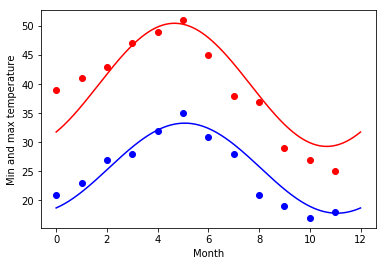

In [22]:

plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')